# Topic : How does the round off error affect the reliablity of the simulation nonlinear dynamical system?

You can get details in [My website](https://munjungkim.github.io/post/lorenz_wheel/)

Here, we are going to solve the Lorenz equation of Malkus-wheel with RK-4 (4th order Runge-Kutta)

-----

$w(t)$ : angular velocity of the water wheel

$\theta$ : angular velocity of the water wheel

$Q(\theta)$ : The rate at which water is pumped in. (Note : This function is independent with time $t$.

$r$ : radius of the wheel

$m(\theta,t)$ : mass distribution of water around rim

-----

and after some calculation (see the website), we have to calcualate


----
$\dot{a_1} : -Ka_1 + wb_1$

$\dot{b_1} : q_1 - Kb_1 - wa_1$

$I\dot{w} = -vw + gra_1\pi$

----

where $a_n(t)$ and $b_n(t)$ are coefficients of the fourier series of $m(\theta,t)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Malkus_function import Malkus
from RK4 import *
from Lorenz_function import Lorenz
from tqdm import tqdm

# Lorenz system

In [73]:
p_list_lorenz= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,3000)

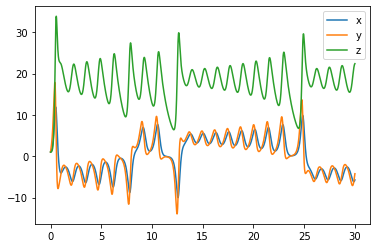

In [75]:
plt.plot(p_list_lorenz[1],p_list_lorenz[0][0],label='x')
plt.plot(p_list_lorenz[1],p_list_lorenz[0][1],label='y')
plt.plot(p_list_lorenz[1],p_list_lorenz[0][2],label='z')
plt.legend()


In [44]:
p_list_malkus[0][2][3000]

22.40954286673684

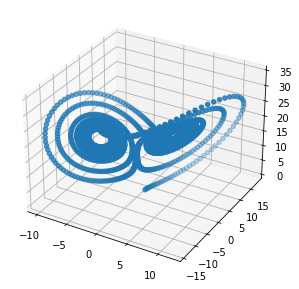

In [42]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0][0,:],p_list_malkus[0][1,:],p_list_malkus[0][2,:])

In [43]:
s=5
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

bifurcation point should be 15.0


# Bifurcation

In [55]:
bifurcate_w = []
r_list = np.linspace(0,99,100)
for rho in tqdm(r_list):
    Lorenz_temp = Lorenz(s=5,r=rho,b=1)
    p_list_malkus= RK4_3variable(1,1,1,Lorenz(s=5,r=rho,b=1).Lorenz_func,0.01,3000)[0]
    bifurcate_w.append(p_list_malkus[2][3000])
    

100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


In [82]:
s=5
print(s)
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

5
bifurcation point should be 15.0


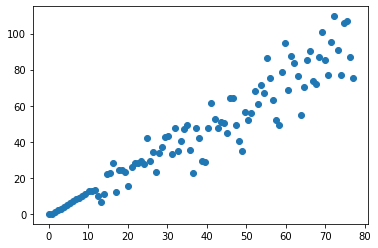

In [56]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,0.1,100)/(K**2)/v,bifurcate_w)

# Malkus-wheel

In [4]:
v = 0.25
K = 0.5
r = 0.25

s = v/(K*r**2 + r**2)/K
print(s)
print("bifurcation point should be",s*(s+1+3)/(s-1-1))


for i in range(q):
    

5.333333333333333
bifurcation point should be 14.933333333333334


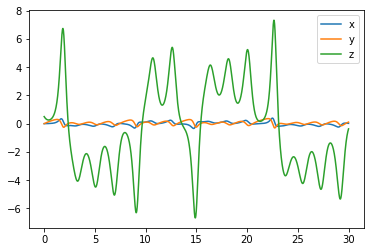

In [26]:
p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=0.35,v=0.25,K=0.5,r=0.25).malkus,0.01,3000)
plt.plot(p_list_malkus[1],p_list_malkus[0][0],label='x')
plt.plot(p_list_malkus[1],p_list_malkus[0][1],label='y')
plt.plot(p_list_malkus[1],p_list_malkus[0][2],label='z')
plt.legend()

In [6]:
bifurcate_w = []
q_list = np.linspace(0,1,200)
for q in tqdm(q_list):
    p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=q,v=0.25,K=0.5,r=0.25).malkus,0.01,3000)[0]
    bifurcate_w.append(p_list_malkus[2,3000])

100%|██████████| 200/200 [00:13<00:00, 14.70it/s]


Text(0, 0.5, '$w(10)$')

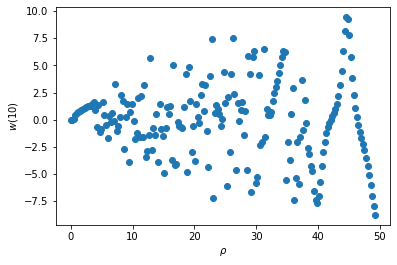

In [9]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,1,200)/(0.5**2)/0.25,bifurcate_w)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$w(10)$')

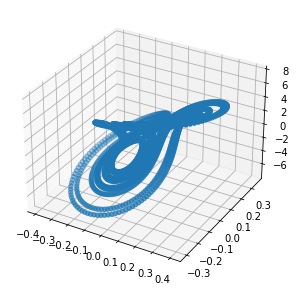

In [32]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0,:],p_list_malkus[1,:],p_list_malkus[2,:])

In [33]:
import matplotlib.animation

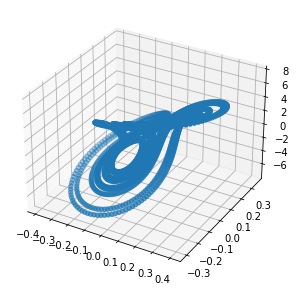

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0,:],p_list_malkus[1,:],p_list_malkus[2,:])

In [38]:
from IPython.display import HTML
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
ani = matplotlib.animation.FuncAnimation(fig, update_graph, 19, interval=400, blit=False)
HTML(ani.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [3]:
import sys

from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import QApplication, QHBoxLayout, QLabel, QSizePolicy, QSlider, QSpacerItem, \
    QVBoxLayout, QWidget

import pyqtgraph as pg
import numpy as np


class Slider(QWidget):
    def __init__(self, minimum, maximum, parent=None):
        
        super(Slider, self).__init__(parent=parent)
        
        self.verticalLayout = QVBoxLayout(self)
        self.label = QLabel(self)
        self.verticalLayout.addWidget(self.label)
        self.horizontalLayout = QHBoxLayout()
        spacerItem = QSpacerItem(0, 20, QSizePolicy.Expanding, QSizePolicy.Minimum)
        self.horizontalLayout.addItem(spacerItem)
        self.slider = QSlider(self)
        self.slider.setOrientation(Qt.Vertical)
        self.horizontalLayout.addWidget(self.slider)
        spacerItem1 = QSpacerItem(0, 20, QSizePolicy.Expanding, QSizePolicy.Minimum)
        self.horizontalLayout.addItem(spacerItem1)
        self.verticalLayout.addLayout(self.horizontalLayout)
        self.resize(self.sizeHint())

        self.minimum = minimum
        self.maximum = maximum
        self.slider.valueChanged.connect(self.setLabelValue)
        self.x = None
        self.setLabelValue(self.slider.value())

    def setLabelValue(self, value):
        self.x = self.minimum + (float(value) / (self.slider.maximum() - self.slider.minimum())) * (
        self.maximum - self.minimum)
        self.label.setText("{0:.4g}".format(self.x))


class Widget(QWidget):
    def __init__(self, parent=None):
        super(Widget, self).__init__(parent=parent)
        self.horizontalLayout = QHBoxLayout(self)
        self.w1 = Slider(0.00, 0.9)
        self.horizontalLayout.addWidget(self.w1)


        self.win = pg.GraphicsWindow(title="Malkus-Lorenz Wheel")
        self.horizontalLayout.addWidget(self.win)
        self.p6 = self.win.addPlot(title="w")
        self.curve = self.p6.plot(pen='r')
        self.update_plot()

        self.w1.slider.valueChanged.connect(self.update_plot)


    def update_plot(self):
        a = self.w1.x
        p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=a,v=0.25,K=0.5,r=0.25).malkus,0.01,3000)

        self.curve.setData(p_list_malkus[0][2])


if __name__ == '__main__':
    app = QApplication(sys.argv)
    w = Widget()
    w.show()
    sys.exit(app.exec_())

SystemExit: 0